***Генетический алгоритм, лабораторная***


**Введение**
---

**Коммивояжёр** (фр. commis voyageur) — бродячий торговец. **Задача коммивояжёра** — одна из самых известных задач комбинаторной оптимизации. Важная задача транспортной логистики, отрасли, занимающейся планированием транспортных перевозок. Коммивояжёру, чтобы распродать нужные и не очень нужные в хозяйстве товары, следует объехать **n** городов и в конце концов вернуться в исходный город. Требуется определить наиболее выгодный маршрут объезда. В качестве меры выгодности маршрута (точнее говоря, невыгодности) может служить суммарное время в пути, суммарная стоимость дороги, или, как в данной работе длина маршрута.

Задача коммивояжёра может быть решена перебором всех вариантов объезда и выбором оптимального. Проблема заключается в том, что количество возможных маршрутов очень быстро возрастает с ростом **n** (оно равно **n!** — количеству способов упорядочения пунктов). К примеру, для 100 пунктов количество вариантов будет представляться 158-значным числом! Мощная ЭВМ, способная перебирать миллион вариантов в секунду, будет биться с задачей на протяжении примерно $3⋅10^{144}$ лет.

Доказано, что не существует алгоритма решения, имеющего степенную сложность (то есть требующего порядка $n^a$ операций для некоторого **a**) — любой алгоритм будет хуже.

В таком случае следует отказаться от попыток отыскать точное решение задачи коммивояжёра и сосредоточиться на поиске приближённого — пускай не оптимального, но хотя бы близкого к нему. В виду большой практической важности задачи полезными будут и приближённые решения.

**Генетический алгоритм** – это разновидность эволюционного алгоритма, который используется для решения задач оптимизации и моделирования путём случайного подбора и комбинирования параметров. Идея генетических алгоритмов основана на эволюционной теории Чарльза Дарвина. Этот алгоритм симулирует процесс естественного отбора, когда более сильные особи из популяции переживают более слабых и производят следующее поколение особей. Данный алгоритм использует эволюционные принципы наследственности, изменчивости и естественного отбора.

**Постановка задачи.** Данная лабораторная работа посвящена рассмотрению решения геометрической задачи коммивояжера на основе генетического алгоритма. На вход данному алгоритму подается некоторое количество городов и их координаты **X**, **Y** на плоскости. Алгоритм должен построить кратчайший маршрут, проходящий через все города с возвращением в исходную точку.

Расстояние между городами считается по евклидовой метрике.

Дополнительные материалы
---

1. [В. Г. Cпицын, Ю. Р. Цой ПРИМЕНЕНИЕ ГЕНЕТИЧЕСКОГО АЛГОРИТМА
ДЛЯ РЕШЕНИЯ ЗАДАЧ ОПТИМИЗАЦИИ](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf)
2. Видео лекция по генетическому алгоритму:  [Генетический алгоритм (Кирсанов М.Н)](https://www.youtube.com/watch?v=ttsZV01aYYU).
3. Учебник: [Люк С. Основы метаэвристик. Перевод.](http://qai.narod.ru/GA/metaheuristics.html)

**Постановка задачи**
---

Зададим первоначальные условия задачи:

1) Выберем количество городов.

2) Расположим города случайным образом на плоскости.

In [14]:
import numpy as np

number_cities = 30 # количество городов
list_cities = np.random.random([number_cities, 2]) # спискок координат городов
list_cities

array([[7.65054775e-01, 4.21408314e-01],
       [4.40244667e-02, 1.04398352e-01],
       [5.83021247e-01, 2.00127224e-01],
       [1.43699645e-01, 3.37487949e-02],
       [4.41501176e-01, 9.28759230e-01],
       [2.54013471e-01, 2.42029465e-01],
       [6.12611793e-01, 7.65006484e-01],
       [9.12240098e-01, 8.90409701e-01],
       [6.37817470e-01, 8.75465024e-01],
       [2.06209426e-02, 7.09556072e-01],
       [9.13708291e-01, 4.95120884e-01],
       [7.30348181e-01, 9.97964891e-01],
       [2.56806998e-01, 3.84676429e-01],
       [6.56327442e-01, 6.72992677e-01],
       [4.74228711e-01, 1.52913035e-01],
       [9.85292855e-01, 8.83918651e-01],
       [4.93972908e-01, 2.30450112e-01],
       [3.27852608e-01, 2.31740089e-01],
       [7.26458625e-01, 9.51117210e-01],
       [3.33331486e-01, 7.53212311e-01],
       [1.90338194e-01, 3.78481581e-01],
       [2.49673526e-01, 9.84803068e-01],
       [1.33675649e-01, 3.25027411e-01],
       [4.71314500e-01, 4.13314364e-01],
       [4.385086

Выведем изображение с местоположением городов.

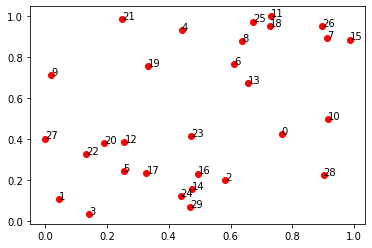

In [15]:
import matplotlib.pyplot as plt

# нарисуем города
plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

# пронумеруем города
for i in range(number_cities):
  plt.annotate(i, (list_cities[i][0], list_cities[i][1]))
plt.show()

**Маршрут**
---

**Маршрут** в данной реализации является массивом. Данный массив содержит number_cities элементов, каждый элемент массива это номер города. Маршрут проходит через города в соответствии с расположением городов в массиве и возвращается в стартовый город (первый город в массиве).

Где number_cities - это количество городов.

Ниже приведен пример построения кратчайшего маршрута проходящего через 10 точек:

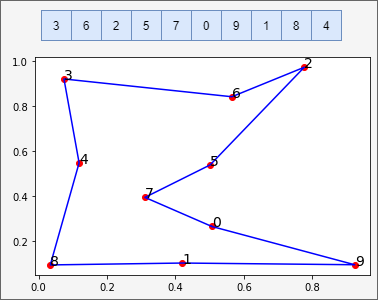

**Функция отрисовки маршрута**

Ниже представлена функция, позволяющая вывести маршрут в виде изображения. На данном изображении можно увидеть местоположение городов, номера городов и маршрут.

На вход данной функции подается список городов и маршрут.

In [16]:
# нарисовать маршрут
def route_image(list_cities, route):
  plt.figure(figsize=(8,6))
  # пронумеруем города
  for i in range(number_cities):
    plt.annotate(i, (list_cities[i][0], list_cities[i][1]), fontsize=14)
  
  # нарисуем города
  plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

  # нарисуем маршрут
  x = [list_cities[route[-1]][0]]
  y = [list_cities[route[-1]][1]]
  for i in range(len(route)):
    x.append(list_cities[route[i]][0])
    y.append(list_cities[route[i]][1])
  plt.plot(x, y, c='blue')

  # выведем изображение
  plt.show()

Сгенерируем и выведем случайный маршрут.

Маршрут: [13  4  9 28 20 29 26 22  0 11  7  1 27 20 29 21 24 17  9  4 17 26 24 21
 22 29  9 22 14  6]


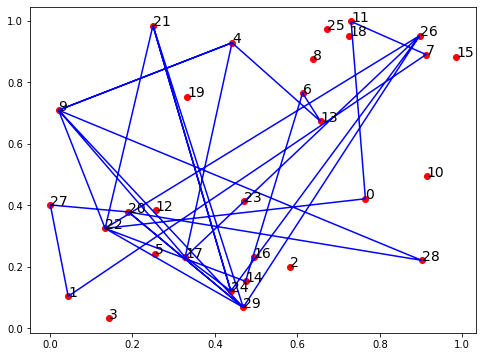

In [17]:
route = np.random.randint(number_cities, size=number_cities) # сгенерированный маршрут
print("Маршрут:", route)
route_image(list_cities, route)

Из рисунка можно увидеть, что при генерации маршрута случайным образом может возникнуть ситуация, когда часть городов останутся пропущенными или посещенными несколько раз.

**Оценка качества маршрута**
---

**Функция оценки качества**

Данная функция позволяет оценить качество построенного маршрута. В данной постановке задачи расстояние между городами и длина маршрута считаются по евклидовой метрике. Также будем давать штраф за не посещение города, т.к. по условию задачи необходимо посетить все города, а маршрут может не содержать некоторых городов.

Формула евклидова расстояния:
$$d(p, q)=\sqrt{\sum_{i=1}^n {(p_i - q_i)}^2},$$

где ***p*** и ***q*** - координаты городов.

На вход данной функции подается список городов (list_cities) и маршрут (route).

**Задание**: Вычислите длину маршрута по евклидовой метрике.

In [18]:
def route_length(list_cities, route):
  # штраф за не посещение города
  length_penalty = 0
  for i in range(len(list_cities)):
    if i not in route:
      length_penalty += 10
  
  # длина маршрута
  length = 0
  for i in range(-1,len(route)-1,1):
    length += np.sqrt((list_cities[route[i],0]-list_cities[route[i+1],0])**2+(list_cities[route[i],1]-list_cities[route[i+1],1])**2)

  # From 0 
  # length = 0 
  # for i in range(0,len(route)-2):
  #   length += np.sqrt((list_cities[route[i],0]-list_cities[route[i+1],0])**2+(list_cities[route[i],1]-list_cities[route[i+1],1])**2)
  # length += np.sqrt((list_cities[route[0],0]-list_cities[route[-1],0])**2+(list_cities[route[0],1]-list_cities[route[-1],1])**2)

  # YOUR CODE HERE
  return length_penalty + length

Оценим качество ранее сгенерированного маршрута и выведем его.

Качество маршрута:  138.30260592423764
Маршрут:  [13  4  9 28 20 29 26 22  0 11  7  1 27 20 29 21 24 17  9  4 17 26 24 21
 22 29  9 22 14  6]


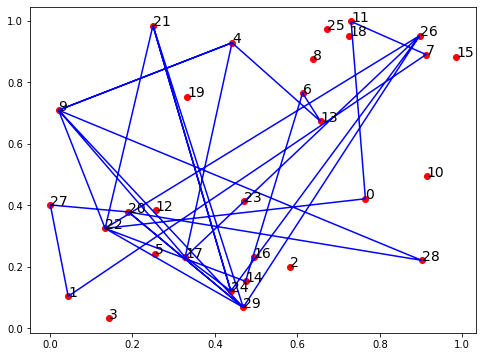

In [19]:
print("Качество маршрута: ", route_length(list_cities, route))
print("Маршрут: ", route)
route_image(list_cities, route)

**Генетический алгоритм**
---

Процесс обучения генетического алгоритма можно разделить на 4 этапа:
1. Создание начальной популяции
2. Оценка качества особей
3. Отбор наиболее сильных решений
4. Мутация и/или скрещивание. Формирование нового поколения

Основные этапы генетического алгоритма представлены на рисунке ниже:

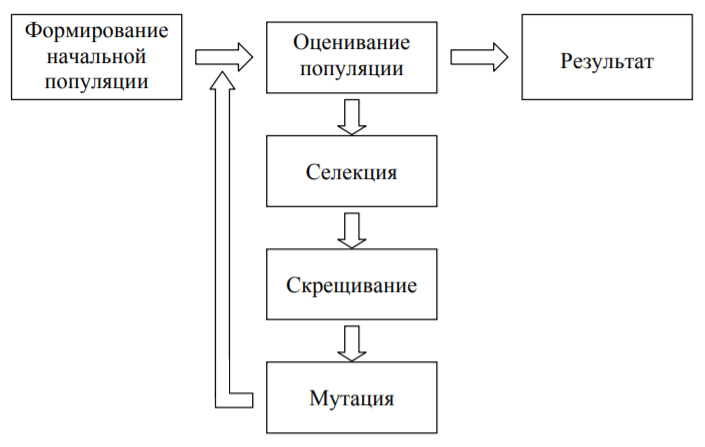

Процесс начинается с набора **особей** (например, случайные маршруты), такой набор называется **популяцией**. Каждая **особь** — это решение задачи, которая была поставлена. Особь характеризуется набором параметров (переменных), которые называют **генами** (например, номера городов). Гены объединены в одну строку и формируют **хромосому** — решение задачи.

**1. Создание начальной популяции**

Создадим начальную популяцию из случайных маршрутов. Случайный маршрут, как правило, является плохим решением данной задачи. Повторное посещение городов в данной поставноке задачи не требуется. Генерация случайных маршрутов без повторного посещения городов позволит улучшить их качество, от того на сколько качественный маршруты будут сгенерированы в начальной популяции зависит скорость схождения алгоритма и конечное качество решения.

Сгенерируем несколько случайных маршрутов без повторного посещения городов и выберем лучший.

In [20]:
number_routes = 100 # количество маршрутов (особей)

# генерация маршрутов без повторений
routes = []
for i in range(number_routes):
  routes.append(np.random.permutation(number_cities))
routes = np.array(routes)

**2. Оценка качества особей. Функция приспособленности.**

Целью данной операции является оценка качества особей для последующего отбора наиболее приспособленных из них.

На вход данной функции подается список особей. Данная функция оценивает и выводит качество всех особей (качество всех маршрутов).

**Задание**: рассчитайте приспособленность каждой особи в популяции (список routes) и запишите полученный результат в список (length_penalty).

In [21]:
# качество особей (маршрутов)
def quality(list_cities, routes):
  # проведем оценку маршрутов
  length_penalty = np.zeros([len(routes)])
  # YOUR CODE HERE
  for i,route in enumerate(routes):
    length_penalty[i] = route_length(list_cities,route)
  return length_penalty

Оценим начальную популяцию и найдем самый короткий и качественный сгенерированный маршрут. Затем выведем его.

Маршрут:  [15 24  1  7 28 27  3 12  4 11 23 29 16 13  8  0 18 25 26 10  5 17 20 19
  6 21  9  2 14 22]
Качество маршрута: 14.01574628280859


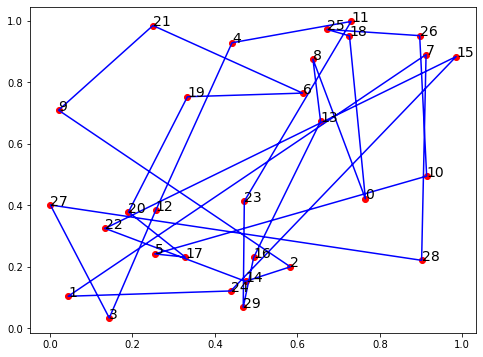

In [22]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Случайный маршрут, построенный без повторного посещения городов, в среднем значительно лучше полностью случайного маршрута.

При постановке задачи с малым количествов городов (например 8) и достаточном количестве сгенерированных маршрутов (например 500), решение задачи может быть найдено уже на данном этапе. При решении задачи с большим количеством городов, требуется использование других подходов. Так можно использовать полный перебор вариантов с проверкой всех возможных решений, но данный подход является ресурсозатратным и может не позволить найти решение задачи за приемлемое время. Использование генетического алгоритма может ускорить поиск решения данной задачи, но не гарантирует нахождения решения.

**3. Отбор наиболее сильных решений. Селекция**

Идея селекции особей заключается в том, чтобы отобрать наиболее сильные решения и передать их гены в следующее поколение, на основе отсева наиболее слабых особей из популяции.

В данном случае мы не будем выделять селекцию как отдельный этап, в данной реализации генетического алгоритма на каждой итерации мы будем заменять одну наименее приспособленную особь на новую. Новая особь получается в результате операции скрещивания или мутации случайных особей популяции.

**4.1. Мутация**

Операция мутация особи заключается в случайном изменении ее генов, например: перестановка городов местами, генерация новой случайной части маршрута и т.д. Мутация особи может как улучшить существующий маршрут, так и ухудшить его. Но делая случайные изменения и сохраняя положительные мутации мы можем постепенно найти более качественное решение задачи.

На изображении ниже можно увидеть пример положительной мутации.

Пример положительной мутации особи (маршрута):
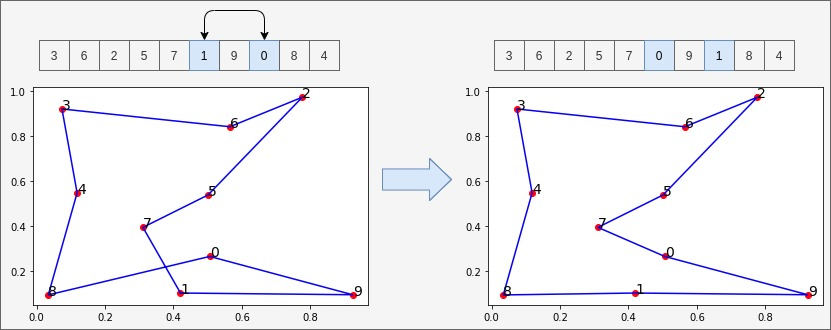

**Задание**: реализуйте операцию мутации (можете попробовать предложить свой вариант).

In [23]:
# мутация маршрута
def mutation(route):
  gen_indices = np.random.randint(0,number_cities,2)
  route[gen_indices[0]],route[gen_indices[1]] = route[gen_indices[1]],route[gen_indices[0]]
  # YOUR CODE HERE
  
  return route

**4.2. Скрещивание**

Операция скрещивания заключается в создании новой особи на основе двух особей родителей, например: объединение двух случайных участков геномов, перенос некоторой последовательности генов из одной особи в другую и т.д. Целью данной операции является объединение положительных качеств особей родителей, которое позволит получить новую особь с более качественным геномом.

Пример успешного скрещивания двух особей (скрещивание маршрутов):

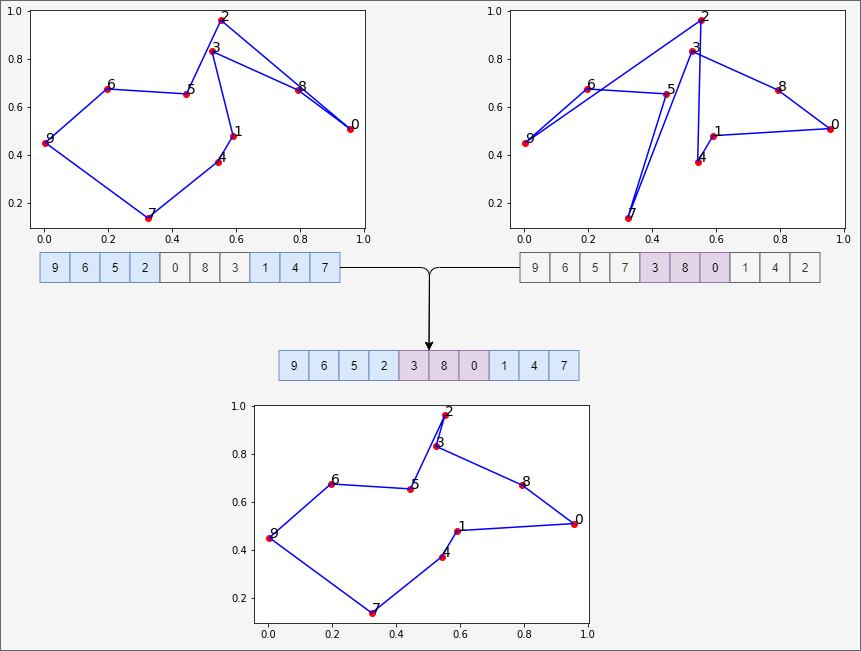

**Задание**: реализуйте операцию скрещивания (можете попробовать предложить свой вариант).

In [24]:
# скрещивание :  двуточечный кроссинговер
# def crossbreeding(route_1, route_2):
#   route_3 = route_1.copy()
#   for i in range(number_cities-3):
#     if sorted(route_1[i:i+3]) == sorted(route_2[i:i+3]) and not (route_1[i]==route_2[i] and route_1[i+1]==route_2[i+1]) :
#         route_3[i:i+3] = route_2[i:i+3]
#         return route_3
#   # YOUR CODE HERE
#   return route_3

# одноточечный кроссинговер
def crossbreeding(route_1,route_2):
  route_3 = route_1.copy()
  gen_index = np.random.randint(0,number_cities)
  route_3[gen_index:number_cities] =  route_2[gen_index:number_cities]
  return route_3
  

Операции мутации и скрещивания могут быть адаптированы под условия данной 
задачи. Вы можете предложить свои варианты. Например, данные операции можно реализовать таким образом, что в результате будет получен маршрут без повторения городов, что увеличит вероятность успешности данных операций.

Реализуем генетический алгоритм.

**Задание**: примените основные операции генетического алгоритма.

Итерация: 0
Маршрут:  [22 27 25  7 24 19 26  5  8 10 20 11 17 16 28 18 12  4 21 14 23  6  1  3
  2 13  0  9 29 15]
Качество маршрута: 18.13302315356604


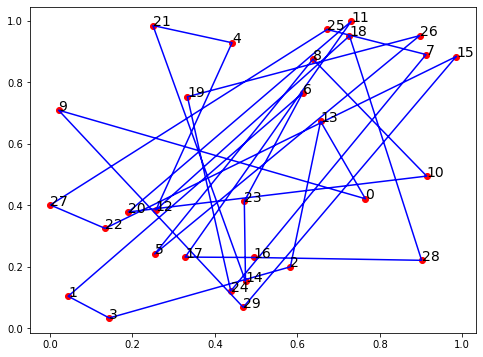

Итерация: 400
Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8  7 15 26 11 18 25 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.778927929342833


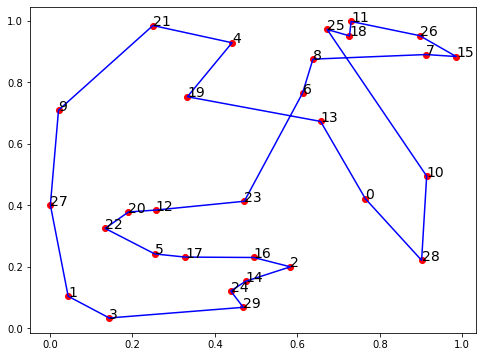

Итерация: 800
Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8 25 18 11 26  7 15 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.419116506489759


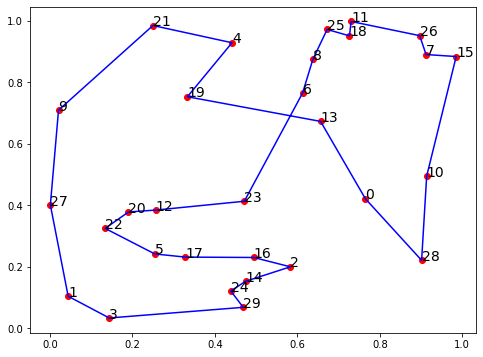

Итерация: 1200
Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8 25 18 11 26  7 15 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.419116506489759


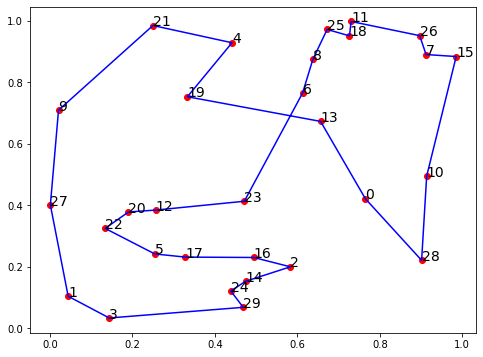

Итерация: 1600
Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8 25 18 11 26  7 15 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.419116506489759


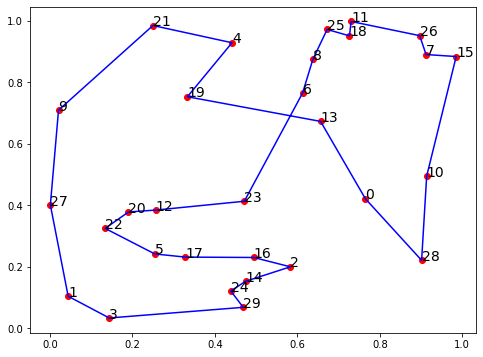

Итерация: 1999
Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8 25 18 11 26  7 15 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.419116506489759


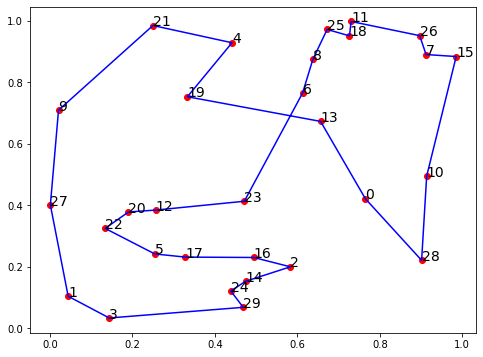

In [25]:
from copy import deepcopy as dcopy

number_iterations = 2000 # количество итераций улучшения

# 2. Оценка качества особей. Функция приспособленности.
# length_penalty - список оценок всех особей популяции
length_penalty = quality(list_cities=list_cities,routes=routes)
# YOUR CODE HERE

for i in range(number_iterations):
  if i%(number_iterations//5) == 0 or i == number_iterations-1:
    print("Итерация:", i)
    print("Маршрут: ", routes[0])
    print("Качество маршрута:", route_length(list_cities, routes[0]))
    route_image(list_cities, routes[0])
  # отсортируем особи в порядке от наиболее приспособленных к наименее приспособленным
  length_penalty = quality(list_cities=list_cities,routes=routes)
  sort_indx = length_penalty.argsort() # индексы отсортированных элементов
  length_penalty = length_penalty[sort_indx] # меняем оценки качества особей местами в соответствии с отсортированными индексами
  routes = routes[sort_indx] # меняем особи местами в соответствии с отсортированными индексами
  # Strategy : Keep 10% best individuals ,generate 90% new from 50% best individuals
  # Keep 10% 
  new_routes = routes.copy()
  # Новые особи с 10 до 99
  for i in range(int(0.1*number_routes),int(number_routes),1):
      # Случайный особь из 50 самых хороших
      route_index_1 = np.random.randint(number_routes*0.5)
      route_index_2 = np.random.randint(number_routes*0.5)
      # Если случайное чило < 0.5 , создаем новую особь с помощью мутации
      if np.random.random()<0.5:
        routes[i] = mutation(new_routes[route_index_1])
      else:  # Если случайное чило > 0.5 , создаем новую особь с помощью скрещивания
        routes[i] = crossbreeding(new_routes[route_index_1],new_routes[route_index_2])


Выведем изображение итогового маршрута.

Маршрут:  [29 24 14  2 16 17  5 22 20 12 23  6  8 25 18 11 26  7 15 10 28  0 13 19
  4 21  9 27  1  3]
Качество маршрута: 5.419116506489759


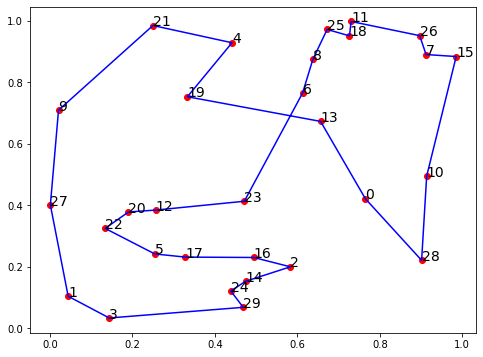

In [26]:
length_penalty = quality(list_cities, routes)
min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Генетический алгоритм позволяет решать множество различных оптимизационных и других задач. В результате данной работы мы рассмотрели реализацию данного алгоритма для задачи о коммивояжере.

Чтобы увеличить скорость и качество работы, генетический алгоритм может быть адаптирован под условия конкретной задачи, так можно изменять реализацию: генерации первого поколения, мутации, скрещивания, селекции, функции приспособленности, выбор особей для мутации и скрещивания, сохранение наиболее приспособленных особей без изменений (элитные особи) и многое другое.

Вопросы к лабораторной работе
---

Для закрепления изученного материала ответьте на приведенные ниже вопросы (вы можете воспользоваться [**основными**](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf) и **дополнительными материалами** (см. выше):

1. Охарактеризуйте понятие **особи** и **популяции** в генетическом алгоритме?

Особь - массив из генов.
Популяция - множество особей 

2. Опишите основные этапы генетического алгоритма.

1. Определение переменных задачи
2. Задание целевой функции
3. Формирование начальной популяции
4. Оценивание популяции 
5. Селекция
6. Скрещивание
7. Мутация 
8. Вернуться к 4-ому этапу
9. Получить результат

3. Какие типы задач можно решать с помощью генетического алгоритма? Приведите примеры таких задач.

– задачи численной оптимизации;

– задачи о кратчайшем пути;

– задачи компоновки;

– составление расписаний;

– аппроксимация функций;

– отбор (фильтрация) данных;

– настройка и обучение искусственной нейронной сети;

– искусственная жизнь;

– биоинформатика;

– игровые стратегии;

– нелинейная фильтрация;

– развивающиеся агенты/машины. 
